In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('house_price_regression_dataset.csv')
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [5]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [6]:
df.tail()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332


In [7]:
df.shape

(1000, 8)

In [8]:
df.size

8000

In [9]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [10]:
df.dtypes

Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
dtype: object

In [11]:
df.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [14]:
cor=df.corr(numeric_only=True)
cor

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


<Axes: >

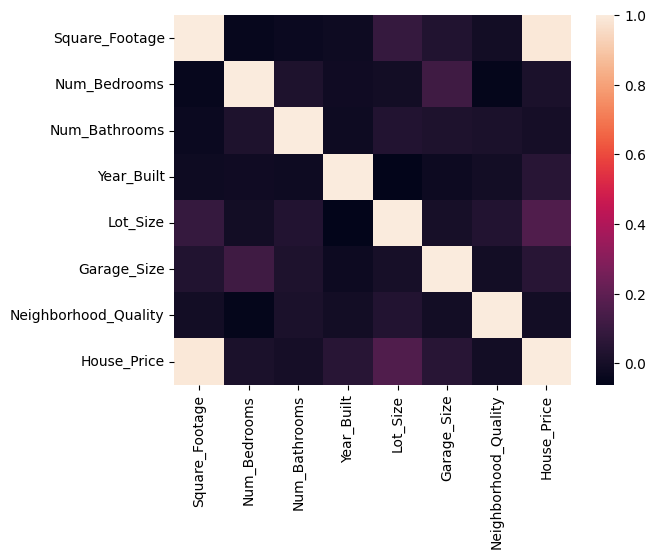

In [15]:
sns.heatmap(cor)

In [16]:
df.drop('Num_Bathrooms',axis=1,inplace=True)
df.drop('Num_Bedrooms',axis=1,inplace=True)
df.drop('Neighborhood_Quality',axis=1,inplace=True)


In [17]:
df.columns

Index(['Square_Footage', 'Year_Built', 'Lot_Size', 'Garage_Size',
       'House_Price'],
      dtype='object')

In [18]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [19]:
x

,Square_Footage,Year_Built,Lot_Size,Garage_Size
0,1360,1981,0.599637,0
1,4272,2016,4.753014,1
2,3592,2016,3.634823,0
3,966,1977,2.730667,1
4,4926,1993,4.699073,0
...,...,...,...,...
995,3261,1978,2.165110,2
996,3179,1999,2.977123,1
997,2606,1962,4.055067,0
998,4723,1950,1.930921,0


In [20]:
y

0      2.623829e+05
1      9.852609e+05
2      7.779774e+05
3      2.296989e+05
4      1.041741e+06
           ...     
995    7.014940e+05
996    6.837232e+05
997    5.720240e+05
998    9.648653e+05
999    7.425993e+05
Name: House_Price, Length: 1000, dtype: float64

<Axes: xlabel='Square_Footage', ylabel='House_Price'>

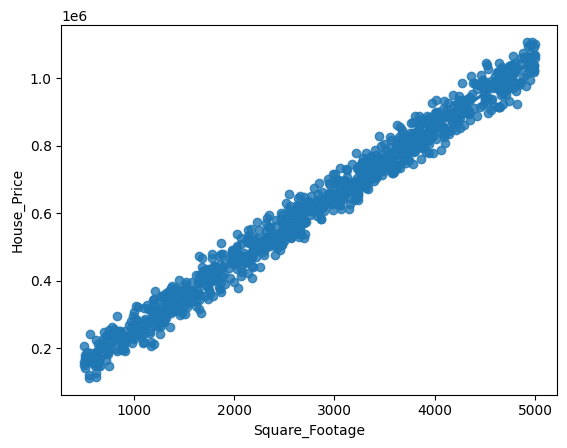

In [21]:
#regplot
#square footage vs price
sns.regplot(x=df['Square_Footage'],y=y)

<Axes: xlabel='Year_Built', ylabel='House_Price'>

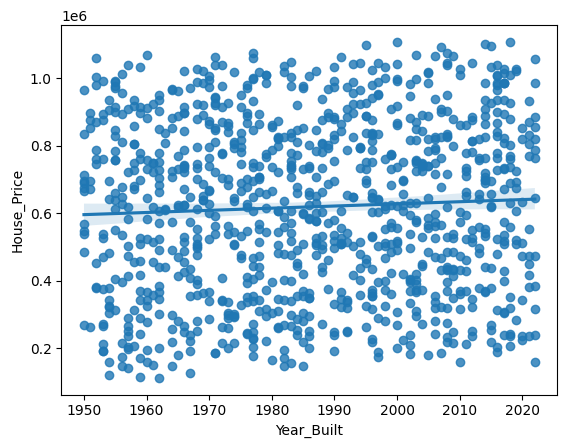

In [22]:
#Year_Built vs price
sns.regplot(x=df['Year_Built'],y=y)

<Axes: xlabel='Lot_Size', ylabel='House_Price'>

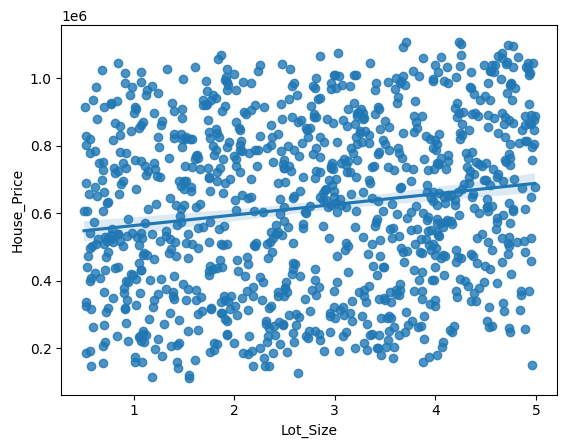

In [23]:
#Lot_Size vs price
sns.regplot(x=df['Lot_Size'],y=y)

<Axes: xlabel='Garage_Size', ylabel='House_Price'>

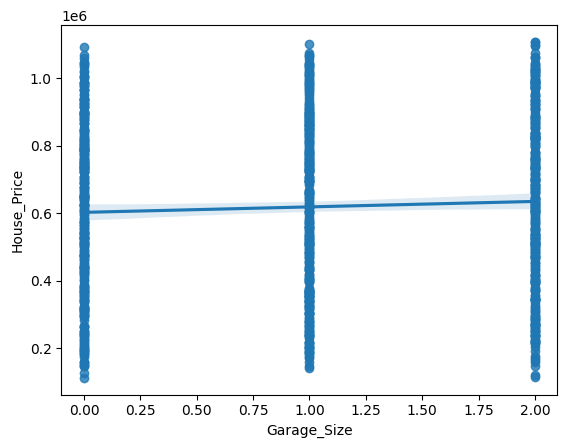

In [24]:
#Garage_Size vs price
sns.regplot(x=df['Garage_Size'],y=y)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.30,random_state=1)

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 506962.47072854,  400279.82754774,  336251.45922844,
        866681.36865073,  819374.51671916,  281379.34036163,
        251862.60701934,  926370.25738482,  160073.04359817,
        793540.04004465,  200863.03787432,  860684.81946189,
        917643.2722145 ,  446789.34676445,  334415.38946421,
        270959.88706442,  266525.27789089,  840835.08738155,
        820773.21680567,  891064.79435504,  631843.51637915,
        611462.37643091,  578479.14649466,  723877.10896291,
        245272.36769045,  443632.61320985,  777727.84182484,
        292411.56912028,  553277.0996898 ,  744684.16630843,
       1018446.32658927,  376317.54909447,  527750.05938088,
       1016050.19976605,  267222.31747195,  212993.78488686,
        692639.24611934,  319387.67953505,  940803.29121993,
        853047.45479186,  878517.19842943,  409734.1928472 ,
        751994.24883014,  440373.62861273,  875195.21161195,
        896352.3932338 , 1024849.16442732,  724872.6280142 ,
        680042.83410996,

In [27]:
y_test

507    501692.851589
818    398823.267326
452    302975.303763
368    874856.271082
242    811129.497176
           ...      
690    619516.332476
765    611557.880854
240    250362.359069
230    539478.403151
915    865263.383636
Name: House_Price, Length: 700, dtype: float64

In [28]:
#DataFrame
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
507,501692.851589,506962.470729,-5269.619139
818,398823.267326,400279.827548,-1456.560221
452,302975.303763,336251.459228,-33276.155466
368,874856.271082,866681.368651,8174.902431
242,811129.497176,819374.516719,-8245.019544
...,...,...,...
690,619516.332476,606155.938496,13360.393980
765,611557.880854,601207.421867,10350.458988
240,250362.359069,240704.939235,9657.419834
230,539478.403151,497802.702824,41675.700326


In [29]:
print(model.coef_)

[  198.1789659   1056.7296188  14974.19129523  6964.2881404 ]


In [30]:
print(model.intercept_)

-2086372.5191167756


In [31]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
print('MAE ',mean_absolute_error(y_test,y_pred))
print('MAPE ',mean_absolute_percentage_error(y_test,y_pred))
print('MSE ',mean_squared_error(y_test,y_pred))
print('RMSE ',root_mean_squared_error(y_test,y_pred))
print('R2 ',r2_score(y_test,y_pred))

MAE  15142.478646318683
MAPE  0.030657146083426717
MSE  350684690.38624215
RMSE  18726.57711345675
R2  0.9945011010643743
